# 1D Curve Fitting using NumPy

In [60]:
import numpy as np
import matplotlib.pyplot as plt  # 1D plotting functions are being imported

In [61]:
np.random.seed(100) 
x = np.linspace(0.01, 3, 20)
y = np.cos(x) + 0.1*np.random.randn(20)

In [62]:
x

array([0.01      , 0.16736842, 0.32473684, 0.48210526, 0.63947368,
       0.79684211, 0.95421053, 1.11157895, 1.26894737, 1.42631579,
       1.58368421, 1.74105263, 1.89842105, 2.05578947, 2.21315789,
       2.37052632, 2.52789474, 2.68526316, 2.84263158, 3.        ])

In [11]:
np.cos(np.pi) # All the numpy functions are "vectorized"

6.123233995736766e-17

In [12]:
np.cos(x)

array([ 0.99995   ,  0.98602657,  0.94773472,  0.88602079,  0.80240996,
        0.69896857,  0.57825304,  0.4432467 ,  0.29728608,  0.1439784 ,
       -0.01288753, -0.16943495, -0.32179501, -0.4662023 , -0.59908798,
       -0.71716795, -0.817524  , -0.89767597, -0.955643  , -0.9899925 ])

In [63]:
p1 = np.poly1d(np.polyfit(x, y, 1))
print(p1)

 
-0.7773 x + 1.211


In [64]:
type(p1)

numpy.poly1d

In [65]:
np.polyfit(x, y, 1)  # this your Linear Regression Model using NumPY

array([-0.77728753,  1.21127288])

In [44]:
p1(1.5)  # evaluatiing the polynomial object for x = 1.5

0.04534158471616645

In [46]:
test_x = np.linspace(0,3,10)
p1(test_x)  # these are the predictions from the polynomial object

array([ 1.21127288,  0.95217704,  0.69308119,  0.43398535,  0.17488951,
       -0.08420634, -0.34330218, -0.60239803, -0.86149387, -1.12058971])

In [47]:
y_pred1 = p1(x)
y_pred1

array([ 1.20350001,  1.0811795 ,  0.95885898,  0.83653847,  0.71421796,
        0.59189745,  0.46957694,  0.34725643,  0.22493591,  0.1026154 ,
       -0.01970511, -0.14202562, -0.26434613, -0.38666664, -0.50898716,
       -0.63130767, -0.75362818, -0.87594869, -0.9982692 , -1.12058971])

In [48]:
y

array([ 0.82497345,  1.02029461,  1.0630383 ,  0.86077719,  0.90054204,
        0.75039045,  0.600371  ,  0.33624237,  0.27833649,  0.16947854,
       -0.05869023, -0.1259186 , -0.38015451, -0.38451759, -0.5318159 ,
       -0.72760906, -0.87065204, -0.7947027 , -0.99945656, -1.10182432])

In [ ]:
# std colors >>> r,g,b,c,m,y,k (black), w
# std markers >>> o, s, h, +, ...
# line styles >>> -, -. , -- , : etc...

# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
# https://matplotlib.org/stable/gallery/color/named_colors.html

$\pi/4$

In [66]:
p2 = np.poly1d(np.polyfit(x, y, 2))
p3 = np.poly1d(np.polyfit(x, y, 3))
print(p2)
print(p3)

          2
-0.05514 x - 0.6113 x + 1.132
      3          2
0.15 x - 0.7324 x + 0.1864 x + 0.9539


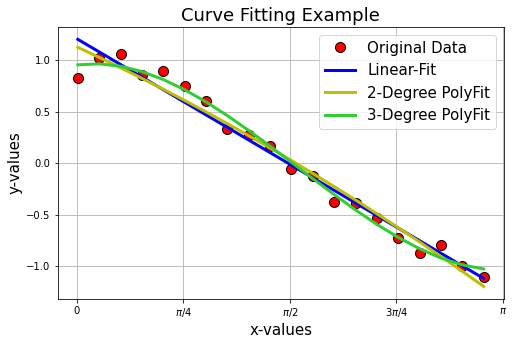

In [55]:
plt.figure(figsize=(8,5))

plt.plot(x, y, 'ro', markersize=10, markeredgecolor='k', label='Original Data')
plt.plot(x, y_pred1, 'b-', lw=3, label='Linear-Fit')
plt.plot(x, p2(x), 'y-', lw=3, label='2-Degree PolyFit')
plt.plot(x, p3(x), '-', color='limegreen', lw=3, label='3-Degree PolyFit')

plt.xlabel('x-values', fontsize=15)
plt.ylabel('y-values', fontsize=15)
plt.title('Curve Fitting Example', fontsize=18)
plt.grid(True)
plt.legend(fontsize=15, loc=1)

plt.xticks([0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi], \
           labels=['0', '$\pi/4$', '$\pi/2$', '$3\pi/4$', '$\pi$'])
plt.show()

In [70]:
def MSE(y_true, y_pred):
    error = y_pred - y_true
    mse = (error**2).mean()
#     MSE = (1/N)*(Sum of squares of the errors)
    return mse

In [71]:
print(MSE(y, p1(x)))  # MSE for 1-degree polynomial
print(MSE(y, p2(x)))  # MSE for 2-degree polynomial
print(MSE(y, p3(x)))  # MSE for 3-degree polynomial

0.014422859400622299
0.012786015105507684
0.005244858083375379


In [73]:
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(y, p1(x))

0.014422859400622299

In [74]:
r2_score(y, p1(x))

0.9718259277552196

In [76]:
r2_score(y, p2(x))

0.9750233914580153

In [77]:
r2_score(y, p3(x))  # R2 for 3-degree poly is much better than 1&2. Hence it is the best fit model!

0.9897545274172012